In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
data=nc.Dataset('/ihesp/archive/Sunway_Runs/LR_HF_TNST/B.E.13.BTRANS.ne30g16.sehires38.003.sunway.pop.h.HMXL.185001.210012.nc')

In [3]:
plotvar = data.variables['HMXL'][8:3000:12,21:30,:53]
lont = data.variables['TLONG'][:,:]
latt = data.variables['TLAT'][:,:]

In [4]:
data2=nc.Dataset('/ihesp/archive/Sunway_Runs/LR_PI_CTRL/B.E.13.B1850C5.ne30g16.sehires38.003.sunway.pop.h.HMXL.000101.050012.nc')

In [5]:
plotvar2 = data2.variables['HMXL'][3008:6000:12,21:30,:53]


In [6]:
aveplot = plotvar.mean(axis=1)

In [7]:
aveplot2 = plotvar2.mean(axis=1)

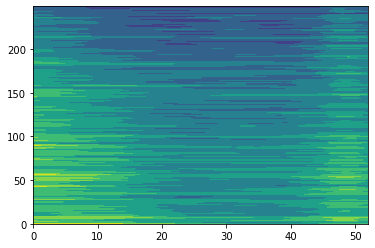

In [8]:
plt.contourf(aveplot)

In [9]:
A = np.arange(250)
#B = lont
B = np.arange(53)
xx, yy = np.meshgrid(B, A)

In [10]:
# nice_cmap 控制色段 （130 白色）；nice_levels 控制color bar 标号
#################################################################
nice_cmap=sns.diverging_palette(245, 10, n=10,as_cmap=True)
lev_cmap = nice_cmap([130,150,160,170,180,190,200,210,220,230,280]) 
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
nice_levels = [0,200,300,400,500,600,700,800,900,1000,1100,1200]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)


/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: The following kwargs were not used by contour: 'spacing'
  if sys.path[0] == '':
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: The following kwargs were not used by contour: 'spacing'


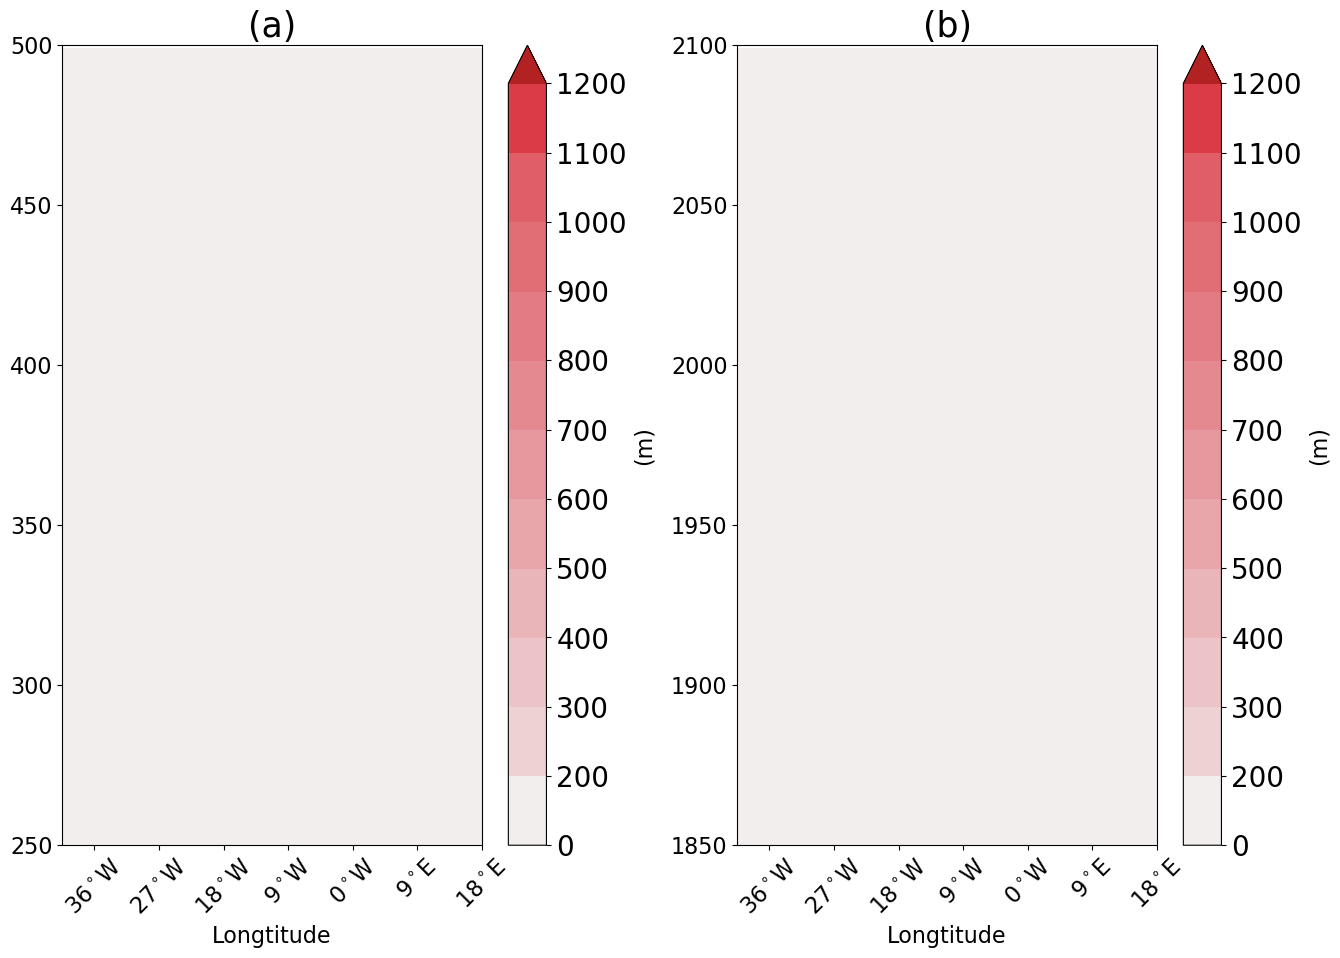

In [12]:
# plot the result
my_font = {'fontname':'Cambria', 'size':'6'}
##################################################################
fig = plt.figure(figsize=(15,10), dpi=100)
################################################################
ax1 = fig.add_axes([0.55, 0.1, 0.35, 0.8],
                    xticklabels=[])

#ax0 = fig.add_axes()
my_font = {'fontname':'Cambria', 'size':'16'}
im = ax1.contourf(xx, yy, aveplot[:,:]/100,cmap = new_cmap,norm =norm,spacing = 'uniform',\
                  levels = nice_levels,extend='max')

im.cmap.set_over('firebrick')



cbar = fig.colorbar(im, ax=ax1,ticks=nice_levels)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('(m)', **my_font)
plt.xticks(range(4,53,8), ['36$^\circ$W','27$^\circ$W','18$^\circ$W','9$^\circ$W', '0$^\circ$W', '9$^\circ$E', '18$^\circ$E'],**my_font)
#plt.yticks(range(0,86,10), ['1920', '1930','1940', '1950','1960','1970','1980', '1990','2000','2010'],**my_font)
plt.xticks(rotation = 45)
plt.yticks(range(0,251,50), ['1850','1900', '1950','2000', '2050','2100','450','500'],**my_font)

plt.xlabel('Longtitude',**my_font)
#plt.ylabel('Years',**my_font)
ax1.set_title('(b)',fontsize = 25)

ax2 = fig.add_axes([0.1, 0.1, 0.35, 0.8],
                    xticklabels=[])

im = ax2.contourf(xx, yy, aveplot2[:,:]/100,cmap = new_cmap,norm =norm,spacing = 'uniform',\
                  levels = nice_levels,extend='max')

im.cmap.set_over('firebrick')

cbar = fig.colorbar(im, ax=ax2,ticks=nice_levels)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('(m)', **my_font)
plt.yticks(range(0,251,50), ['250','300', '350','400', '450','500','450','500'],**my_font)
plt.xlabel('Longtitude',**my_font)
plt.xticks(range(4,53,8), ['36$^\circ$W','27$^\circ$W','18$^\circ$W','9$^\circ$W', '0$^\circ$W', '9$^\circ$E', '18$^\circ$E'],**my_font)
#plt.yticks(range(0,86,10), ['1920', '1930','1940', '1950','1960','1970','1980', '1990','2000','2010'],**my_font)
plt.xticks(rotation = 45)
#plt.ylabel('Years',**my_font)
ax2.set_title('(a)',fontsize = 25)
plt.savefig("fumixLR.png",bbox_inches='tight',dpi=fig.dpi)